## 3.4 A binary classification : Classifying movie reviews
last modified : 2021-3-22 by Imryoung Jeong

In [29]:
from IPython.display import Image

In [5]:
import keras
from keras.datasets import imdb

#### 3.4.1 The IMDB dataset

In [7]:
(train_data, train_labels) , (test_data, test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 8s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or 

In [14]:
len(train_data)

25000

#### 3.4.2 Preparing the data

In [12]:
import numpy as np

In [1]:
# Encoding the integer sequences into a binary matrix

def vectorize_sequences(sequences, dimension = 10000):
    
    # create all-zero len(sequences) * dimension matrix
    results = np.zeros((len(sequences), dimension))
    
    # enumarte : create tuple (i, sequence)
    # here, sequence is a form of list 
    for i, sequence in enumerate(sequences) :
        results[i, sequence] = 1
    return results

In [21]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [25]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [24]:
# compare two lists

print(train_data[0])
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[0. 1. 1. ... 0. 0. 0.]


In [27]:
print(train_labels)
print(y_train)

[1 0 0 ... 0 1 0]
[1. 0. 0. ... 0. 1. 0.]


#### 3.4.3. Building your network

In [28]:
from keras import models
from keras import layers

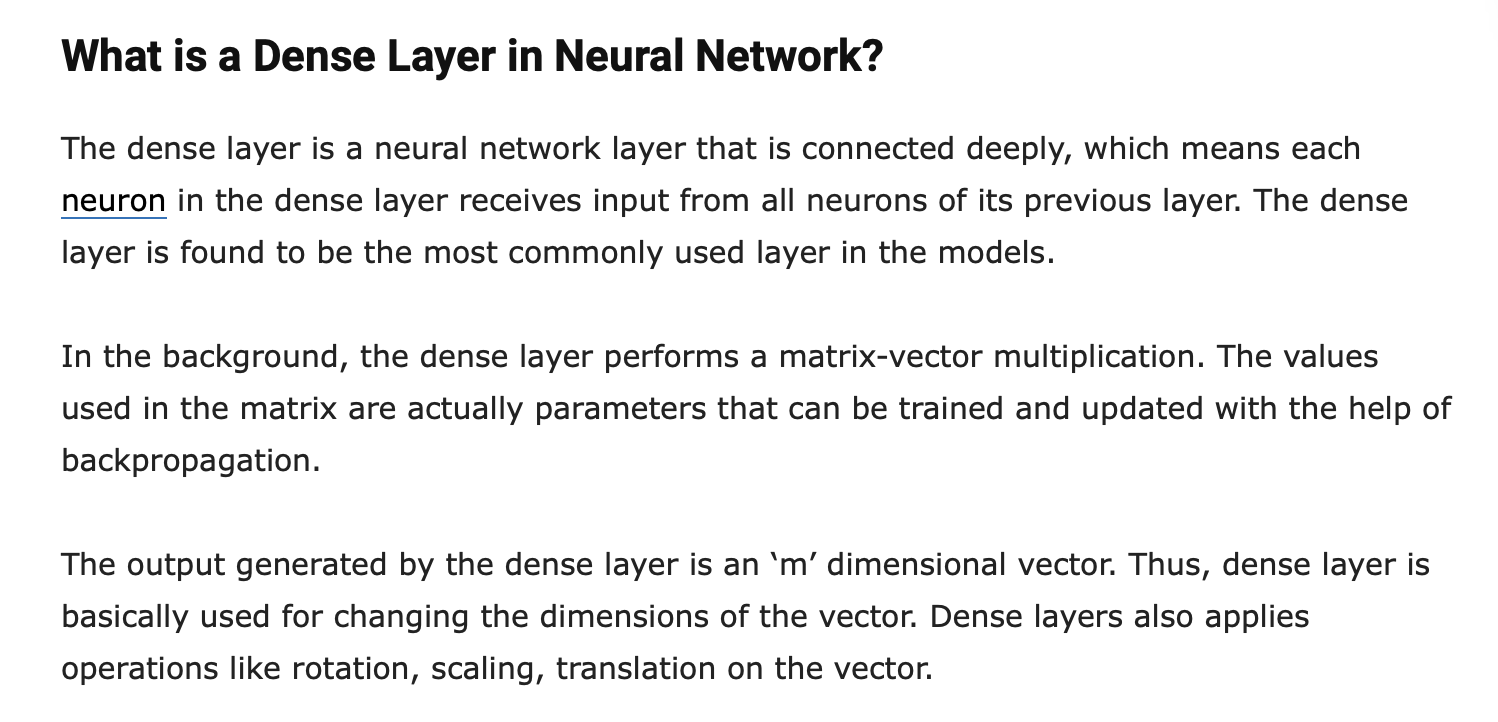
https://machinelearningknowledge.ai/keras-dense-layer-explained-for-beginners/

In [31]:
# Define 'model' as a sequential model(1-1?)
model = models.Sequential()

# Add layers
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

> <b>Crossentropy</b> : usually the best choice when you're dealing with models that output <i>probalities</i>, which measures the distance between the ground-truth distribution and your predictions

In [42]:
# Compiling the model

# Use optimizer package from Keras 

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [ ]:
# Configuring the optimizer & customizing losses and metrics

"""
from keras import optimizers
from keras import losees
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(1r = 0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.bindary_accuracy])
             
"""

#### 3.4.4 Validating your approach

In [34]:
# Create a validation set by setting apart 10,000 samples from the original training data

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [35]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5679 - accuracy: 0.7131 - val_loss: 0.3750 - val_accuracy: 0.8658
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2941 - accuracy: 0.9121 - val_loss: 0.3247 - val_accuracy: 0.8718
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2212 - accuracy: 0.9308 - val_loss: 0.2816 - val_accuracy: 0.8873
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1699 - accuracy: 0.9469 - val_loss: 0.2752 - val_accuracy: 0.8888
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1331 - accuracy: 0.9637 - val_loss: 0.2947 - val_accuracy: 0.8827
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1134 - accuracy: 0.9663 - val_loss: 0.3084 - val_accuracy: 0.8822
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0890 - accuracy: 0.9758 - val_loss: 0.3343 - val_accuracy: 0.8788
Epoch 8/20
30

In [38]:
import matplotlib.pyplot as plt

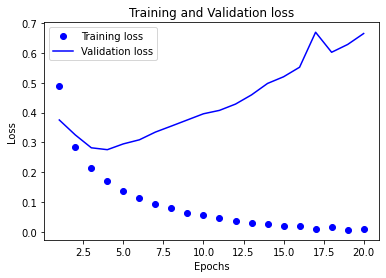

In [40]:
# Plotting the training and validation loss & accuracy

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) +1)

#plt.plot(X, Y, option1, option2)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

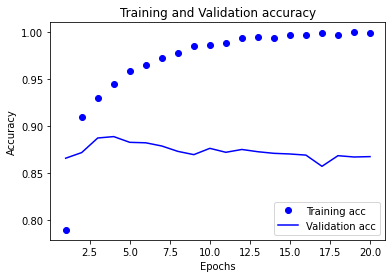

In [45]:
plt.clf() # Clears the figure

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

> <b>Overfitting</b> : overoptimizing on the training data, and end up learning representations that are specific to the training data and don't generalize to data outside of the training set

In [48]:
#  Retraining a model from scratch


model = models.Sequential()

model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)

# evaluate on the test data : model.evalute(x,y) provides [loss, accuracy]
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.5459 - accuracy: 0.7367
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2635 - accuracy: 0.9134
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.1935 - accuracy: 0.9361
Epoch 4/4
782/782 [==============================] - 1s 801us/step - loss: 0.2967 - accuracy: 0.8822
[0.29669198393821716, 0.8821600079536438]


In [49]:
# Generate the likeligood of reviews being positive(=1) 
model.predict(x_test)

array([[0.17337912],
       [0.9998486 ],
       [0.80343205],
       ...,
       [0.10931838],
       [0.05795363],
       [0.5724729 ]], dtype=float32)

### Wrapping up 
---
<ul>
    <li>Stack of <code>Dense</code> layers with <code>relu</code> activations can solve a wide range of problems</li><br>
    <li>In a binary classification problem, your network should end with a <code>Dense</code> layer with one unit and a <code>sigmoid</code> activation: the output of your network should be a scalar between 0 and 1, encoding a <b>probability</b></li><br>
    <li>With such a scalar sigmoid output on a binary classification problem, the loss function you should use is <code>binary_crossentropy</code></li><br>
    <li>The <code>rmsprop</code> optimizer is generally a good enough choice, whatever your problem!</li>
</ul>